In [1]:
import distl
import numpy as np

# Distributions with custom callable functions

[Function](../api/Function.md) distributions allow passing a custom callable function, to which the sampled values from any number of other distribution objects will be passed.

## Vectorizable functions


In [2]:
a = distl.uniform(0, 5, label='a')
b = distl.gaussian(5, 3, label='b')

In [3]:
def my_vectorized_func(a, b, c=1, d=3):
    return a*b + c*d

By default, the [Function](../api/Function.md) distribution will assume that the passed callable function is vectorized (that is - all arguments accept arrays).  We can test that this is the case by passing dummy arrays to all the args and kwargs.

In [4]:
my_vectorized_func(np.linspace(0,1,11), np.linspace(0,1,11), np.linspace(0,1,11), np.linspace(0,1,11))

array([0.  , 0.02, 0.08, 0.18, 0.32, 0.5 , 0.72, 0.98, 1.28, 1.62, 2.  ])

To create the distribution, we must pass the callable function as well as any args or kwargs - each of these can either be a distribution object themself, or a float/integer.

In [5]:
f = distl.function(my_vectorized_func, args=(a,b), kwargs={'d': 6})

In [6]:
f

<distl.function my_vectorized_func(a, b, d=6) unit=None>

In [7]:
f.vectorized

True

When calling [sample](../api/Function.sample.md), the args and kwargs are passed on to the callable function, after any distributions are individually sampled.

In [8]:
f.sample()

16.32536439847219

In [9]:
f.sample(size=3)

array([ 6.95636155,  6.22685956, 34.32410556])

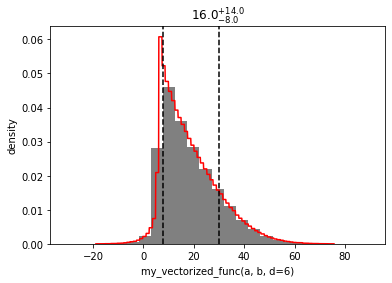

In [10]:
out = f.plot(show=True)

## Non-vectorized functions

However, in some cases, the callable function may include some logic that is not vectorized and does not support passing arrays.  For example, here we'll create a simple function that has an if statement based on the value of `c`.

In [11]:
def my_nonvectorized_func(a, b, c=1, d=3):
    if c > 1:
        return a*b + c*d
    else:
        return a*b - c*d

Now if we pass arrays to all of the args/kwargs, an error would be raised.

In [12]:
try:
    my_nonvectorized_func(np.linspace(0,1,11), np.linspace(0,1,11), np.linspace(0,1,11), np.linspace(0,1,11))
except Exception as e:
    print(e)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


It is important to note here that this will only require disabling vectorization if `c` (in this case) is passed as a distribution.  If we pass the value of `c` as a float/int (or allow it to fallback to its default value since its a kwarg), then vectorization will still work.

In [13]:
f = distl.function(my_nonvectorized_func, args=(a,b), kwargs={'c':3, 'd': 6})

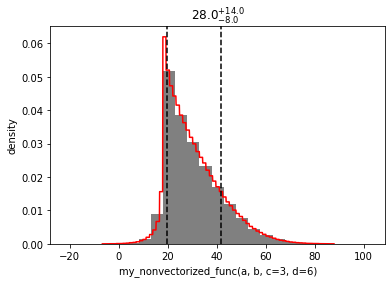

In [14]:
out = f.plot(show=True)

However, if we pass `c` as a distribution, we will get the same error when attempting to plot or sample as we did when passing arrays.

In [15]:
c = distl.uniform(0,2)

In [16]:
f = distl.function(my_nonvectorized_func, args=(a,b), kwargs={'c':c, 'd': 6})

In [17]:
try:
    out = f.plot(show=True)
except Exception as e:
    print(e)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


To get around this, pass `vectorized=False` when creating the distribution.  Internally this will fallaback on a list comprehension, which is SLOW, but does the trick.

In [18]:
f = distl.function(my_nonvectorized_func, args=(a,b), kwargs={'c':c, 'd': 6}, vectorized=False)

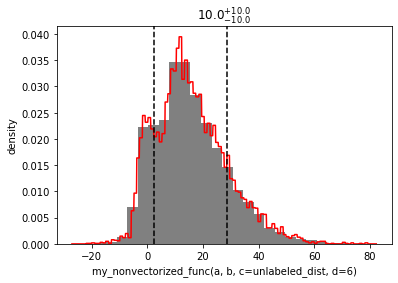

In [19]:
out = f.plot(show=True)